In [1]:
%load_ext autoreload
%autoreload 2

from utils import load_data, make_partially_labelled, calculate_pertinence, plot_relevance_histogram,plot_efficiency_curve, plot_efficiency_by_pct
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

#### Découpage de la base en apprentissage/test

In [2]:
(X_train, y_train), (X_test, y_test) = load_data("Wave.txt")

Chargement des données effectué
Données d'apprentissage X:  (2500, 40)  Y:  (2500,)
Données test X:  (2500, 40)  Y:  (2500,)


Fréquences des labels :
 0    1692
2    1655
1    1653
dtype: int64


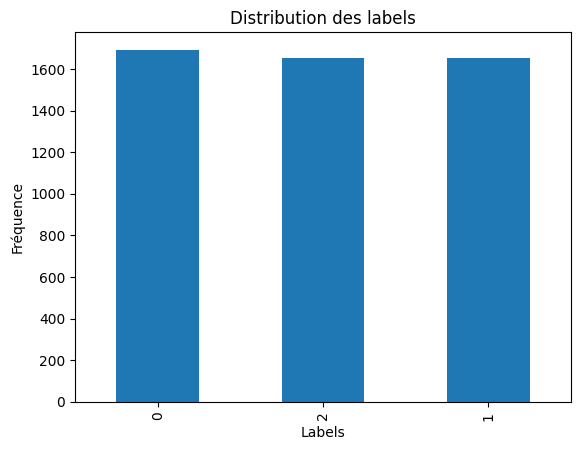

In [3]:
label_counts = pd.Series(np.hstack((y_train, y_test))).value_counts()
print("Fréquences des labels :\n", label_counts)

label_counts.plot(kind='bar')
plt.title('Distribution des labels')
plt.xlabel('Labels')
plt.ylabel('Fréquence')
plt.show()

#### Simulation de l'aspect semi-supervisé

In [4]:
y_train_partial = make_partially_labelled(y_train, pct=0.3)
y_train_partial

array([ 1., -1., -1., ...,  2.,  2., -1.])

Fréquences des labels :
 -1.0    1750
 0.0     254
 1.0     248
 2.0     248
dtype: int64


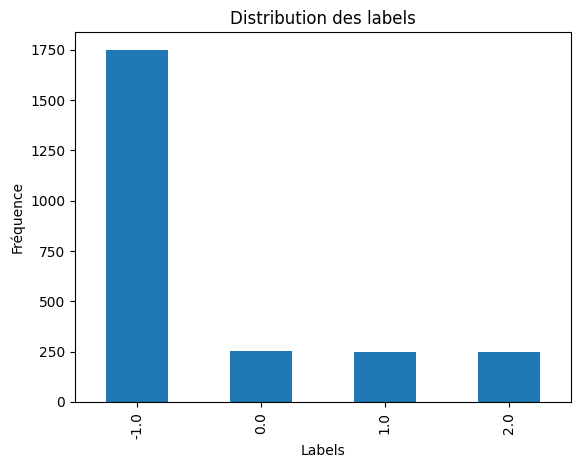

In [5]:
label_counts = pd.Series(y_train_partial).value_counts()
print("Fréquences des labels :\n", label_counts)

label_counts.plot(kind='bar')
plt.title('Distribution des labels')
plt.xlabel('Labels')
plt.ylabel('Fréquence')
plt.show()

#### Sélection de variables semi supervisé

In [6]:
scores = calculate_pertinence(X_train, y_train_partial)
scores

{'V0': 8.817857592313419e-07,
 'V1': 3.386249224754972e-06,
 'V2': 1.835032245232477e-05,
 'V3': 4.3711367774861816e-05,
 'V4': 7.032437646006852e-05,
 'V5': 9.085089846934322e-05,
 'V6': 0.00012180415744118083,
 'V7': 0.00010170895615905759,
 'V8': 6.93776243336528e-05,
 'V9': 6.0770424951611154e-05,
 'V10': 5.726896100930651e-05,
 'V11': 4.5620260359595456e-05,
 'V12': 7.472707300116581e-05,
 'V13': 9.010808734697464e-05,
 'V14': 0.0001180689344674805,
 'V15': 0.00010507939291456322,
 'V16': 7.09411822743335e-05,
 'V17': 5.007831175397752e-05,
 'V18': 2.317664733976854e-05,
 'V19': 8.844222848595338e-06,
 'V20': 8.31496657794525e-08,
 'V21': 1.2277380121491198e-07,
 'V22': 1.5458978989607365e-08,
 'V23': 3.766641254728425e-08,
 'V24': 1.4634783898178954e-07,
 'V25': 5.856165597531658e-07,
 'V26': 1.743569462423953e-07,
 'V27': 1.138800097581397e-07,
 'V28': 1.5856098839767188e-07,
 'V29': 1.0621739189760153e-06,
 'V30': 7.794210062580081e-08,
 'V31': 6.414633038619504e-07,
 'V32': 4.

#### Evaluation de la sélection

**Tracer l'histogramme des pertinences**

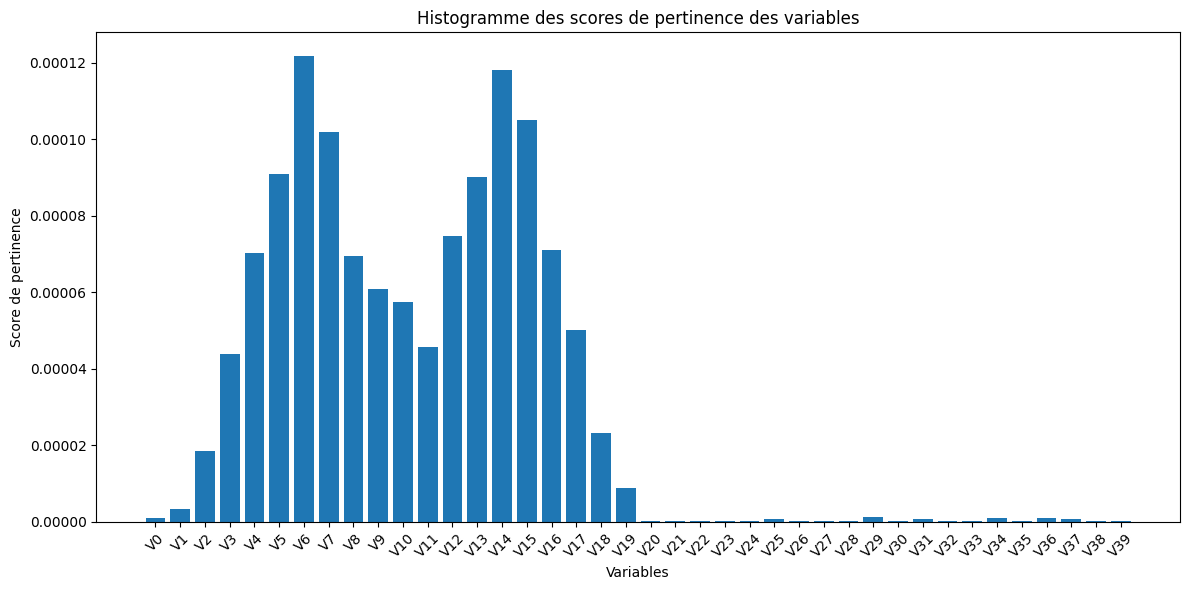

In [7]:
plot_relevance_histogram(scores)

**Tracer une courbe d'efficacité (selon les performances d'un MLP appris sur A) sur la base T, en fonction du nombre de variables pertinentes sélectionnées par tranche de 5 variables** 

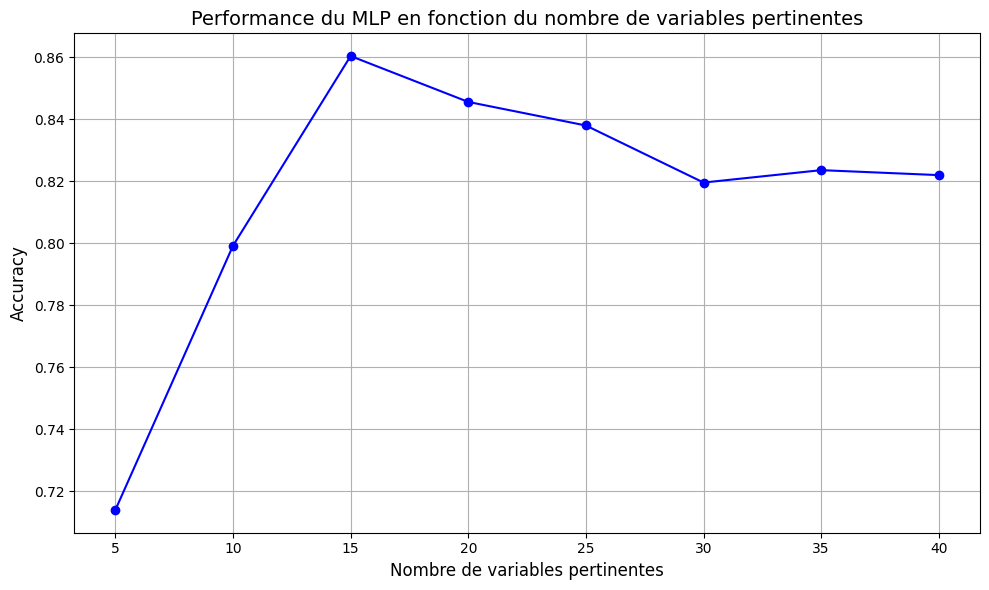

In [8]:
plot_efficiency_curve(X_train, X_test, y_train_partial, y_test, scores)

**Tracer la courbe sur les données non normalisées** 

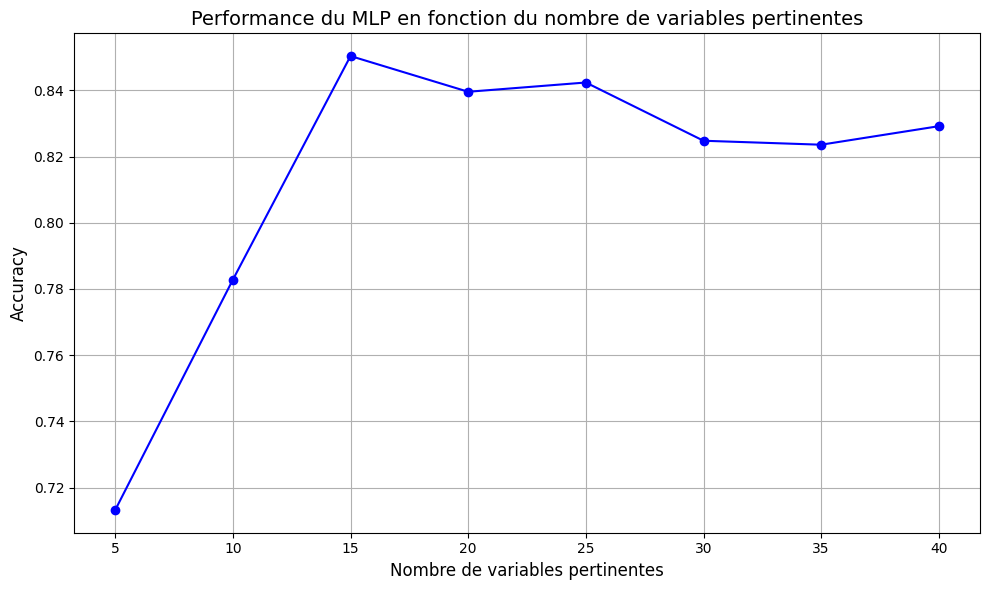

In [9]:
plot_efficiency_curve(X_train, X_test, y_train_partial, y_test, scores, normalised=False)

**Tracer la courbe sur les variables non-pertinentes**

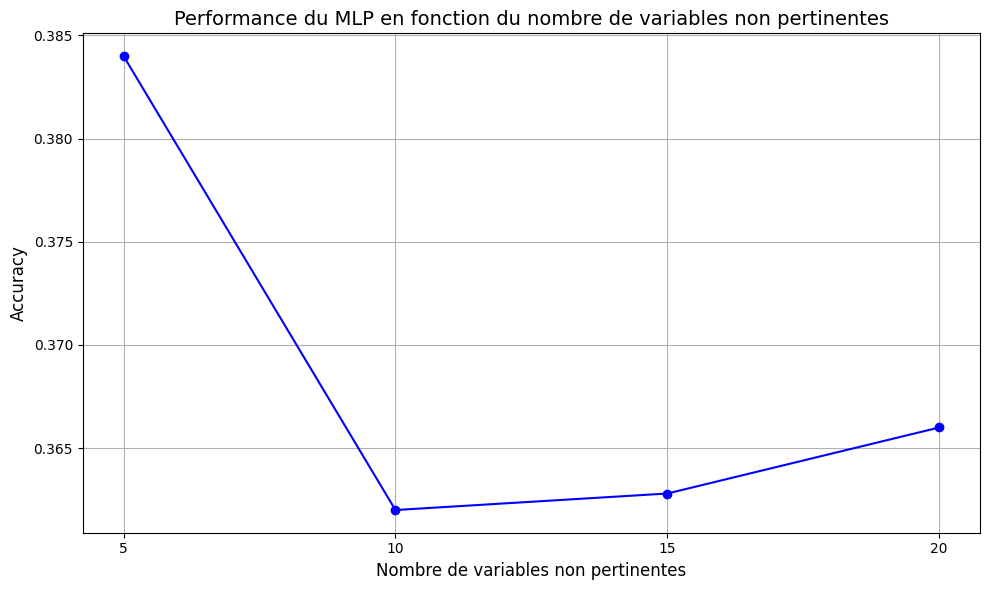

In [10]:
plot_efficiency_curve(X_train, X_test, y_train_partial, y_test, scores, reverse=False)

**Tracer la courbe sans sélection de variables**

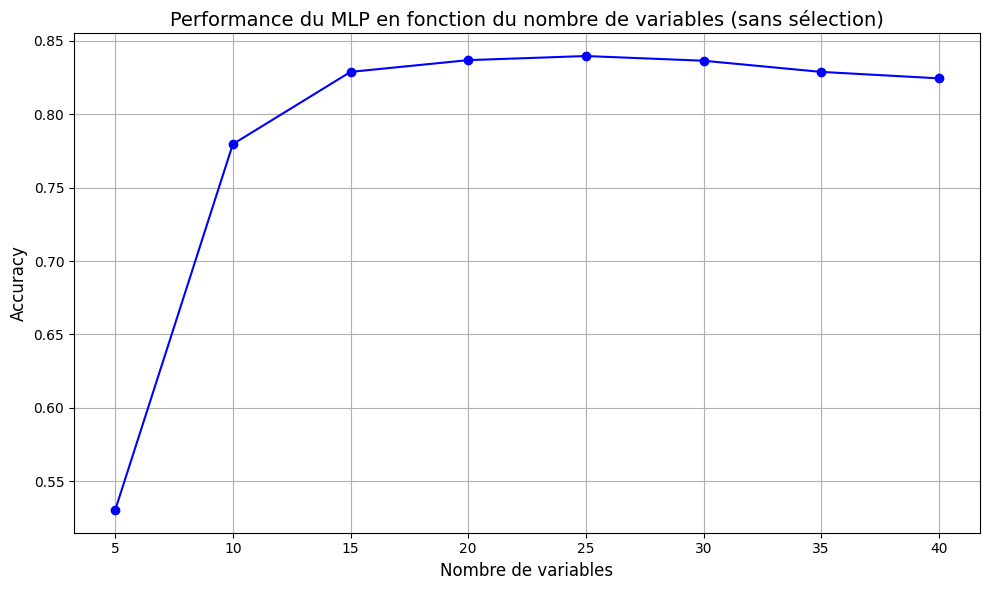

In [11]:
plot_efficiency_curve(X_train, X_test, y_train_partial, y_test, scores, feature_select=False)

**En fixant le nombre de variables sélectionnées à 20, tracer la courbe de performance en fonction du % de données labélisées**

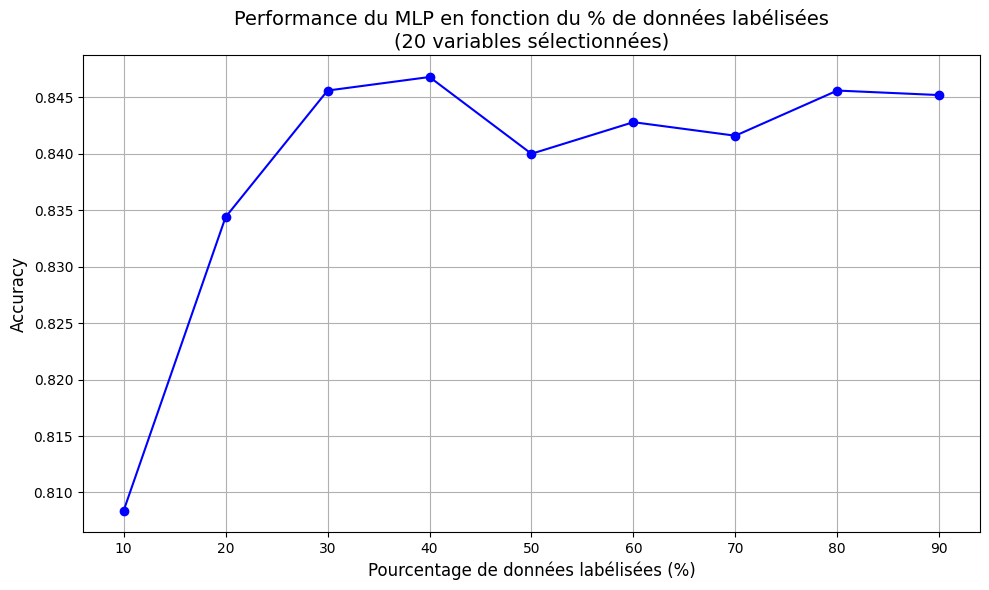

In [12]:
plot_efficiency_by_pct(X_train, X_test, y_train, y_test)